# **FODS CASE STUDY - GROUP 16**



---



CB.EN.U4CSE19428 - Karan M

CB.EN.U4CSE19442 - Nanda Kishore B

CB.EN.U4CSE19455 - Rohit PM


CB.EN.U4CSE19457 - Suraj SP



---



### In this case study we used the Cancer prediction Dataset to predict whether a cancer cell is Malignant or Benign tumor. We have done visualisation of the dataset through some plots, found some good correlation between variables and also found some outliers so we have have pre-processed our data in such a way that Machine Learning model gives very good accuracy. We have got a accuracy of nearly 99%, with pretty high F1 score

### Imports and loading dataset



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fods/dataset canc.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN




---



**List of data points available in this**

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')



---



**We have 569 records**

In [ ]:
df.shape

(569, 33)

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**All of the fruitful datapoints are float**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Checking for null values**

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The last column *Unnamed: 32* is of no use as all of them is null

In [ ]:
df['Unnamed: 32'].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

In [ ]:
df.drop('Unnamed: 32',axis=1,inplace=True)

**So we have dropped it**

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Checking the distribution of our Dataset**

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

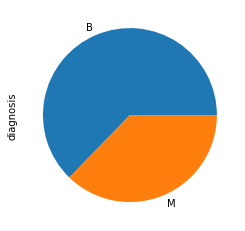

In [ ]:
df['diagnosis'].value_counts().plot.pie()

**Our Dataset is slightly biased in the ratio of 37:63**

Number of Benign:  212
Number of Malignant :  357
Percentage of Benign:  37.258347978910365
Number of Malignant :  62.741652021089635


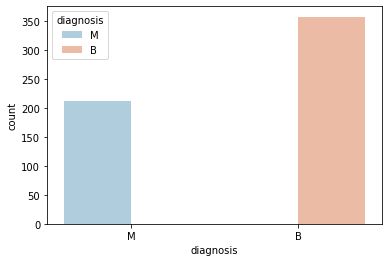

In [ ]:
sns.countplot(x='diagnosis',hue='diagnosis',data=df, palette='RdBu_r')
M, B = df.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
print('Percentage of Benign: ',B/(B+M)*100)
print('Number of Malignant : ',M/(B+M)*100)

**Checking the correlation (later used in feature engineering)**

In [ ]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


**Heat Map**

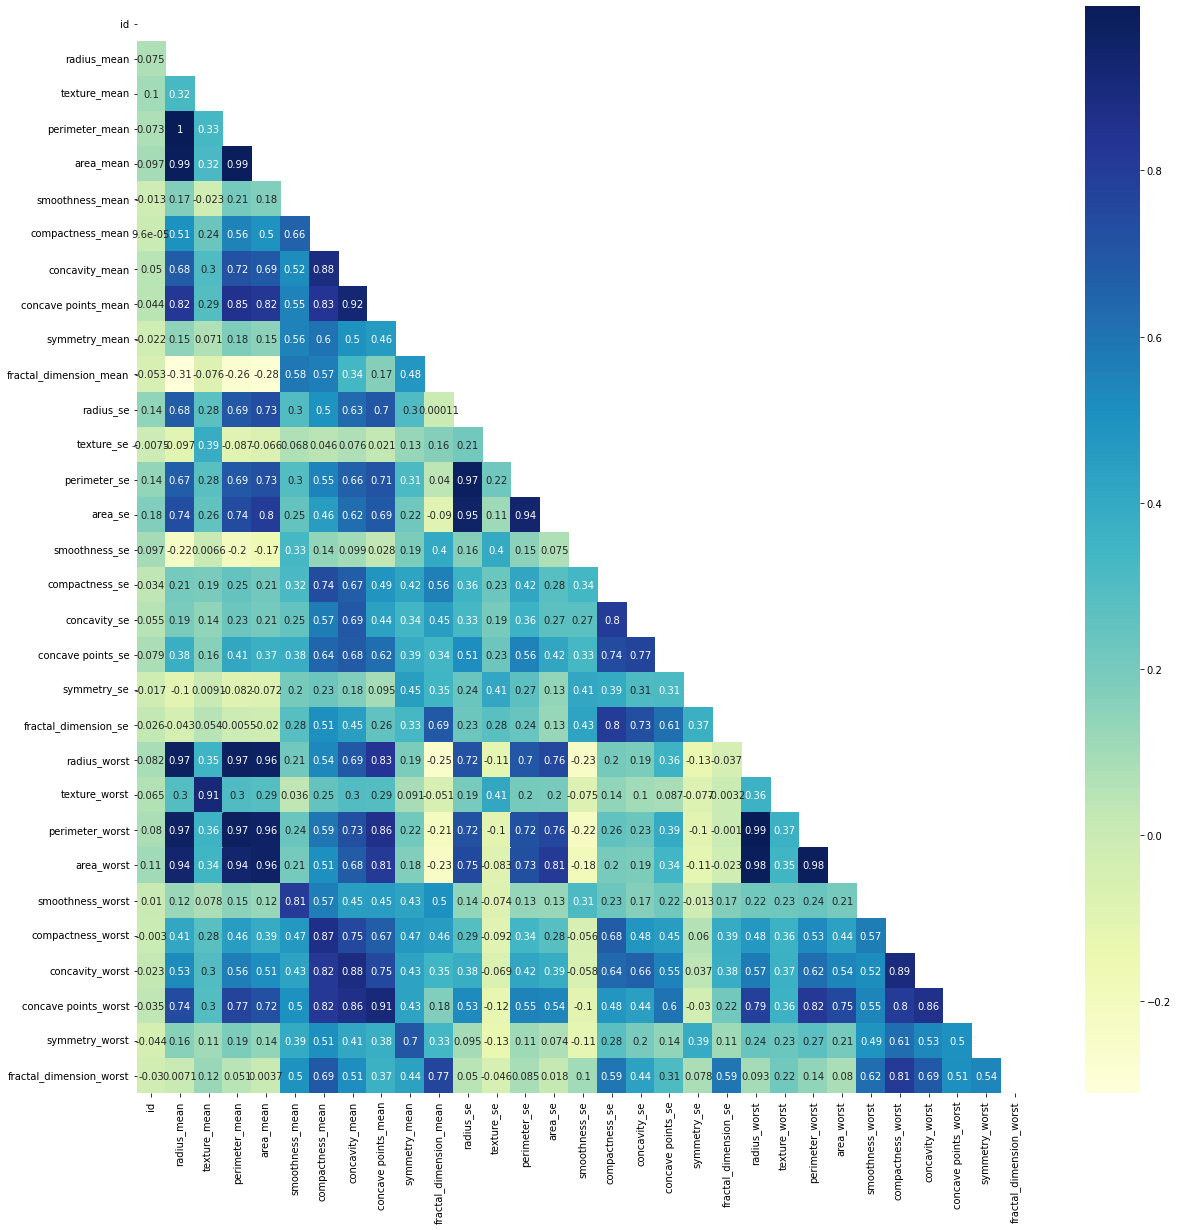

In [ ]:
plt.figure(figsize=(20,20))
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, annot=True, cmap="YlGnBu", mask=mask);

**Label encoding the prediction column**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['labelEncoded'] = label_encoder.fit_transform(df['diagnosis'])

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,labelEncoded
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df[['diagnosis','labelEncoded']]

,diagnosis,labelEncoded
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


In [ ]:
dfcorr = df.corr()

**Checking the correlation with the output variable (M or B)**

In [ ]:
dfcorr['labelEncoded']

id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [ ]:
corrWithLabelEncoded = dfcorr['labelEncoded']

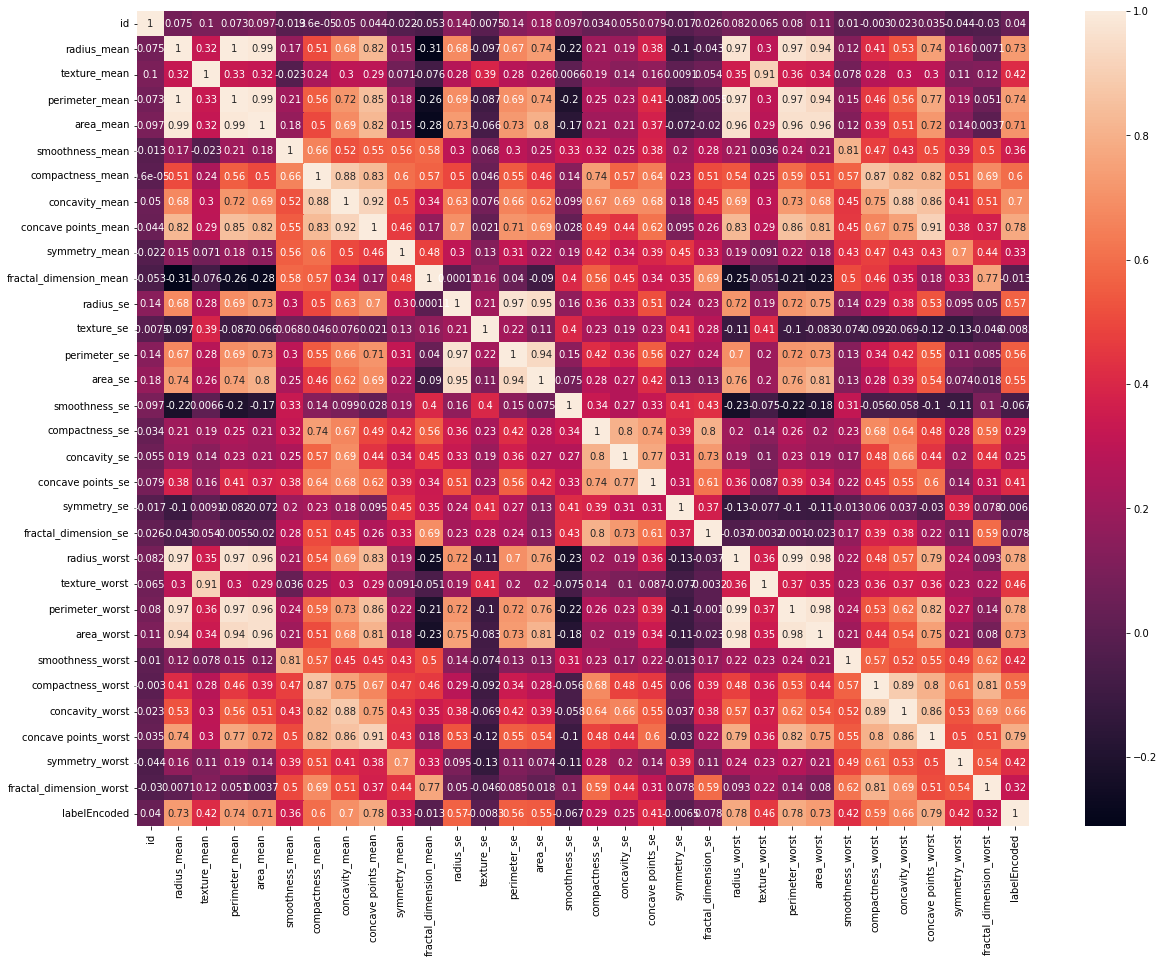

In [ ]:
plt.figure(figsize= (20,15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
corrWithLabelEncoded.sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

**Sorting columns in order of their correlation**

In [ ]:
corrWithLabelEncoded.abs().sort_values()

symmetry_se                0.006522
texture_se                 0.008303
fractal_dimension_mean     0.012838
id                         0.039769
smoothness_se              0.067016
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

In [ ]:
type(corrWithLabelEncoded.abs().sort_values())

pandas.core.series.Series

**Taking the columns with a correlation threshold of 0.60**

In [ ]:
high_corr_columns = ['compactness_worst','compactness_mean','concavity_worst','concavity_mean','area_mean',
'radius_mean','area_worst','perimeter_mean','radius_worst','concave points_mean','perimeter_worst',
'concave points_worst','labelEncoded']

In [ ]:
df_high_corr = df[high_corr_columns]

In [ ]:
df_high_corr.head()

,compactness_worst,compactness_mean,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst,labelEncoded
0,0.6656,0.27760,0.7119,0.3001,1001.0,17.99,2019.0,122.80,25.38,0.14710,184.60,0.2654,1
1,0.1866,0.07864,0.2416,0.0869,1326.0,20.57,1956.0,132.90,24.99,0.07017,158.80,0.1860,1
2,0.4245,0.15990,0.4504,0.1974,1203.0,19.69,1709.0,130.00,23.57,0.12790,152.50,0.2430,1
3,0.8663,0.28390,0.6869,0.2414,386.1,11.42,567.7,77.58,14.91,0.10520,98.87,0.2575,1
4,0.2050,0.13280,0.4000,0.1980,1297.0,20.29,1575.0,135.10,22.54,0.10430,152.20,0.1625,1


**Some Visulations between columns**

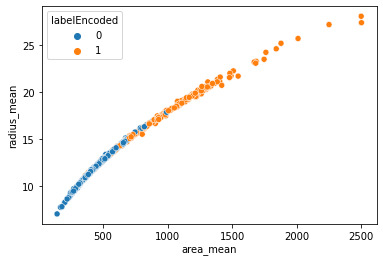

In [ ]:
sns.scatterplot(x=df_high_corr['area_mean'],y=df_high_corr['radius_mean'],hue=df_high_corr['labelEncoded'])

After Radius_mean of 15(Roughly) the points belong to data that are malignant so we can infer that if size is more the chances of malignant is high

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


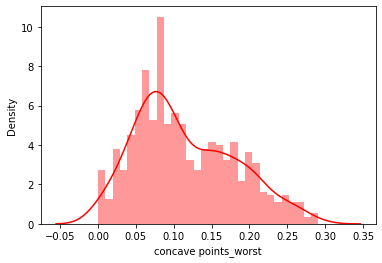

In [ ]:
sns.distplot(df_high_corr['concave points_worst'], color ='red', bins = 30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


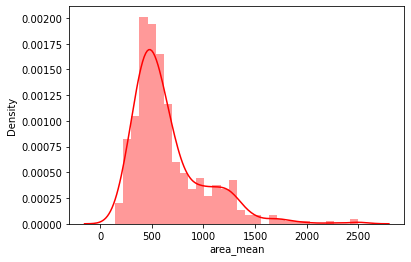

In [ ]:
sns.distplot(df_high_corr['area_mean'], color ='red', bins = 30)

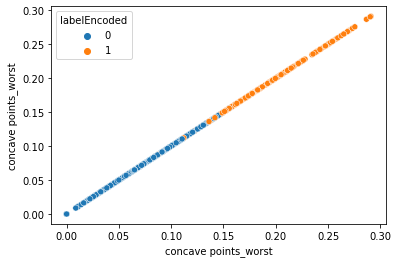

In [ ]:
sns.scatterplot(x=df_high_corr['concave points_worst'],y=df_high_corr['concave points_worst'],hue=df_high_corr['labelEncoded'])

After concave_points of 0.15(Roughly) the points belong to data that are malignant so we can infer that if number of concave portions of the contour is more then the chances of malignant is high





---



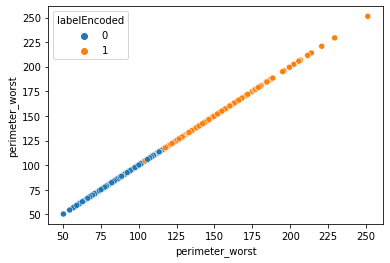

In [ ]:
sns.scatterplot(x=df_high_corr['perimeter_worst'],y=df_high_corr['perimeter_worst'],hue=df_high_corr['labelEncoded'])

After perimeter_worst of 120(Roughly) the points belong to data that are malignant so we can infer that if perimeter of cancer portion is more then the chances of malignant is high

---



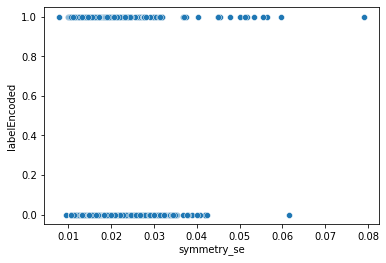

In [ ]:
sns.scatterplot(x=df['symmetry_se'],y=df['labelEncoded'])

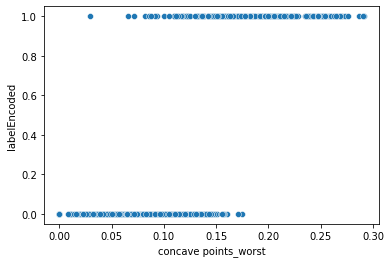

In [ ]:
sns.scatterplot(x=df['concave points_worst'],y=df['labelEncoded'])

**The above plots clearly shows there is a boundary separation problem, hinting toward using logistic regression to provide best results**

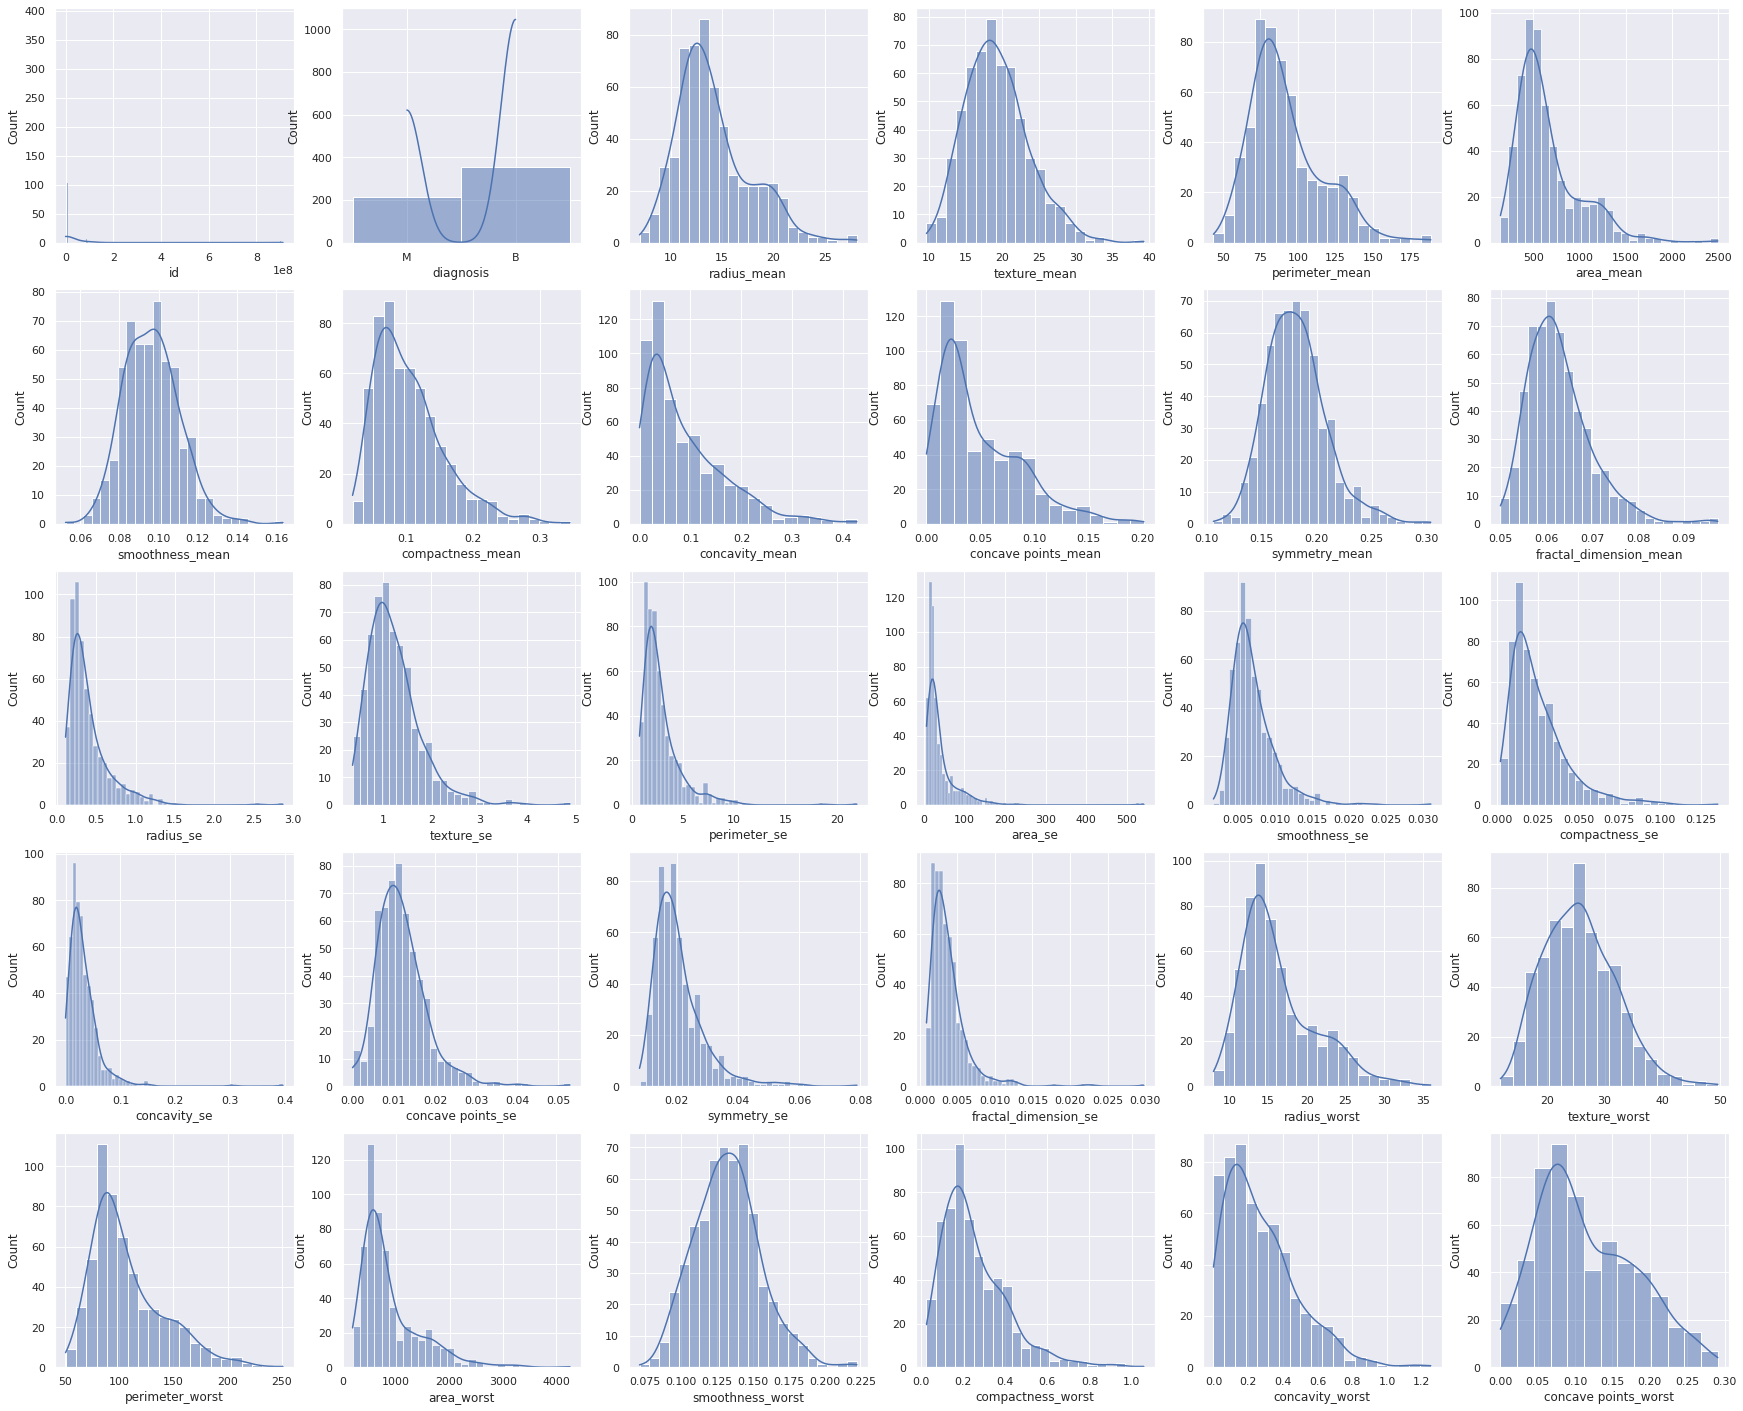

In [ ]:
plt.figure(figsize = (30, 25))
sns.set(style="darkgrid")
plotnumber = 1
for column in df:
  if plotnumber <= 30:
    ax = plt.subplot(5, 6, plotnumber)
    sns.histplot(df[column],kde=True)
    plt.xlabel(column)
  plotnumber += 1
plt.show()

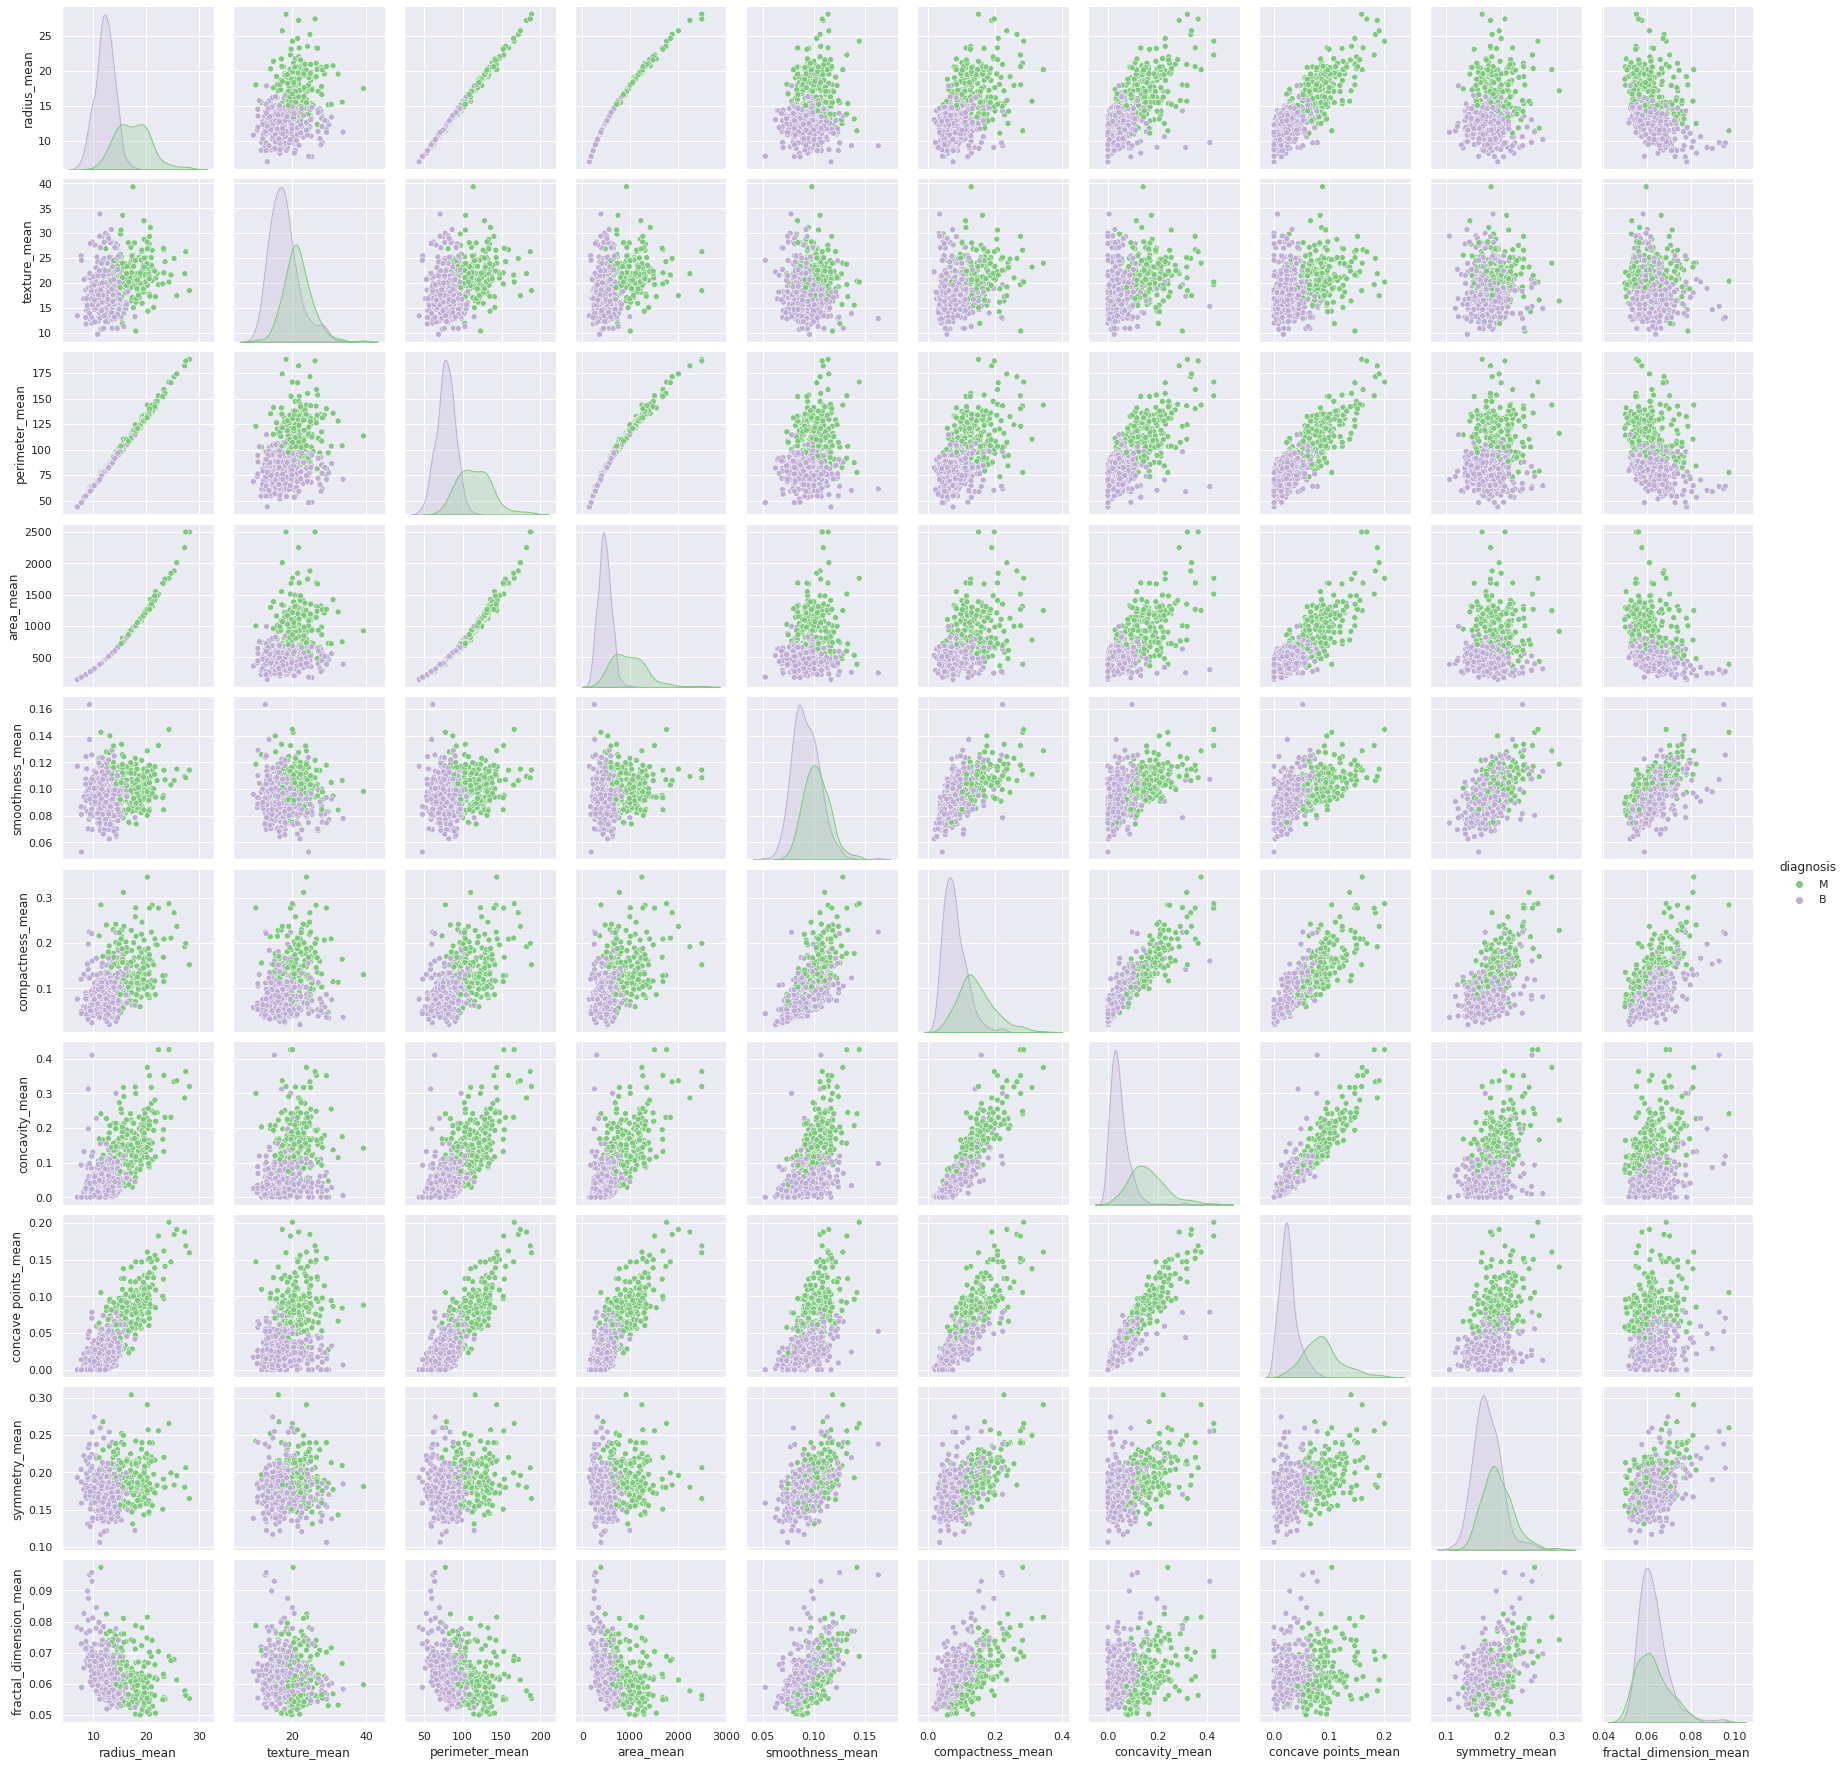

In [ ]:
mean_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(df[mean_col],hue = 'diagnosis', palette='Accent')

In [ ]:
df_high_corr.head()

,compactness_worst,compactness_mean,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst,labelEncoded
0,0.6656,0.27760,0.7119,0.3001,1001.0,17.99,2019.0,122.80,25.38,0.14710,184.60,0.2654,1
1,0.1866,0.07864,0.2416,0.0869,1326.0,20.57,1956.0,132.90,24.99,0.07017,158.80,0.1860,1
2,0.4245,0.15990,0.4504,0.1974,1203.0,19.69,1709.0,130.00,23.57,0.12790,152.50,0.2430,1
3,0.8663,0.28390,0.6869,0.2414,386.1,11.42,567.7,77.58,14.91,0.10520,98.87,0.2575,1
4,0.2050,0.13280,0.4000,0.1980,1297.0,20.29,1575.0,135.10,22.54,0.10430,152.20,0.1625,1


**Outlier Detection**

In [ ]:
Q1 = df_high_corr.quantile(0.25)
Q3 = df_high_corr.quantile(0.75)

**IQR of the selected highly correlated columns**

In [ ]:
IQR = Q3 - Q1
print(IQR)

compactness_worst         0.19190
compactness_mean          0.06548
concavity_worst           0.26840
concavity_mean            0.10114
area_mean               362.40000
radius_mean               4.08000
area_worst              568.70000
perimeter_mean           28.93000
radius_worst              5.78000
concave points_mean       0.05369
perimeter_worst          41.29000
concave points_worst      0.09647
labelEncoded              1.00000
dtype: float64


**Number of outliers**

In [ ]:
((df_high_corr < (Q1 - 1.5 * IQR)) | (df_high_corr > (Q3 + 1.5 * IQR))).sum()

compactness_worst       16
compactness_mean        16
concavity_worst         12
concavity_mean          18
area_mean               25
radius_mean             14
area_worst              35
perimeter_mean          13
radius_worst            17
concave points_mean     10
perimeter_worst         15
concave points_worst     0
labelEncoded             0
dtype: int64

**Outlier Removal**

In [ ]:
df_final_without_outlier = df_high_corr[~((df_high_corr < (Q1 - 1.5 * IQR)) |(df_high_corr > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_high_corr.shape

(569, 13)

In [ ]:
df_final_without_outlier.shape

(510, 13)

A total of 59 rows are dropped after removing the outliers

**Model Training with the current modifications of the dataset**

In [ ]:
X = df_final_without_outlier.drop('labelEncoded',axis=1)

In [ ]:
y = df_final_without_outlier['labelEncoded']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(random_state = 0,max_iter=100000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9411764705882353


**The accuracy is impressive to start with initially**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        64
           1       0.92      0.92      0.92        38

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102



The recall and f1_score are also very good


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, prediction))

0.9411764705882353


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        64
           1       0.92      0.92      0.92        38

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102



KNN's performance is very similar to that of Logistic



---



**Comparitive Study 1**

**We will now see how the model performs if all columns are trained rather than just the highly correlated columns**

In [ ]:
raw_data = df

Above is not a deep copy, it is just like giving an alais

In [ ]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,labelEncoded
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
raw_data.drop('diagnosis',axis=1, inplace=True)

In [ ]:
X = raw_data.drop('labelEncoded',axis=1)

In [ ]:
y = raw_data['labelEncoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Logistic**

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6228070175438597


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, prediction))

0.7543859649122807


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114



**As we can see, the model is performing poorly when compared to just training with highly correlated columns**

**Only High correlated columns Trained**

1.   Logistic accuracy = 0.94
2.   KNN accuracy = 0.94





---



**All columns Trained**

1.   Logistic accuracy = 0.62
2.   KNN accuracy = 0.75



**So cleraly the best result is acheived when only highly correlated columns are trained**

**Comparitive Study 2**

In this section we compare which is best.
Including Outlier or excluding Outlier.
We have used the highly correlated columns only as it is proved to give the best result according to the above study

In [ ]:
X = df_high_corr.drop('labelEncoded',axis=1)

In [ ]:
y = df_high_corr['labelEncoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Logistic**

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9912280701754386


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**KNN**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, prediction))

0.9473684210526315


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



**To our surprise the model is performing better when compared to training with outliers removed**

**Outliers Removed**

1.   Logistic accuracy = 0.94
2.   KNN accuracy = 0.94





---



**No Outliers Removed**

1.   Logistic accuracy = 0.99
2.   KNN accuracy = 0.94



**This is because, in our example we can't assume a datapoint to be an outlier as some tumor may be large**

**With a accuracy of 0.99, our model have almost reached peak performance**

**Comparitive Study 3**

**Sampling vs No sampling**

Here we have used High Corr Columns with no outlier removal for sampling and training, as it is proved to be best from above 2 case studies.

In [ ]:
X = df_high_corr.drop('labelEncoded',axis=1)

In [ ]:
y = df_high_corr['labelEncoded']

**OVERSAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

1    357
0    357
Name: labelEncoded, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Logistic**

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9440559440559441


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        69
           1       0.97      0.92      0.94        74

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143



**KNN**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, prediction))

0.9090909090909091


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        69
           1       0.94      0.88      0.91        74

    accuracy                           0.91       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.91      0.91      0.91       143





---



In [ ]:
X = df_high_corr.drop('labelEncoded',axis=1)

In [ ]:
y = df_high_corr['labelEncoded']

**RANDOM UNDERSAMPLING**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample = RandomUnderSampler()
X, y = undersample.fit_resample(X, y)

In [ ]:
y.value_counts()

1    212
0    212
Name: labelEncoded, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Logistic**

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9647058823529412


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.95      0.97      0.96        39

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85



**KNN**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, prediction))

0.9647058823529412


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.95      0.97      0.96        39

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85



**Model's performance is slightly reducing as expected though not drastic.**

This is because the model is already some what balanced 

1.   OverSampling : Doing this is indroducing some additional bias
2.   UnderSampling : It might have removed useful features

These might be the reason for the drop in performance

**No Sampling**

1.   Logistic accuracy = 0.99
2.   KNN accuracy = 0.94





---



**Over Sampling**

1.   Logistic accuracy = 0.94
2.   KNN accuracy = 0.91





---



**Under Sampling**

1.   Logistic accuracy = 0.95
2.   KNN accuracy = 0.95



**CONCLUSION**
1.   For this particular dataset, best result is acheived when only high correlated features are selected.
2.   In this Cancer prediction dataset, we have been provided with size of tumor and its properties. So we can't consider that to be an outlier. 
3.   Also dataset is already balanced to an extent, so balancing it furthur only decreases performance



**Sample Hypothesis Testing**

In [ ]:
import scipy.stats as st

In [ ]:
non_canc = df[(df['labelEncoded'] == 0)]['radius_mean']

Non cancerous people have less mean radius

In [ ]:
n = 30
alpha = 0.05
mu = df['radius_mean'].mean()
sigma = df['radius_mean'].std()
sample = non_canc.sample(30)
xbar = sample.mean()

In [ ]:
z = (xbar - mu)/(sigma / np.sqrt(n))
z_critical = (st.norm.ppf(alpha))

In [ ]:
z,z_critical

(-3.2570054118032656, -1.6448536269514729)

In [ ]:
canc = df[(df['labelEncoded'] == 1)]['radius_mean']

Cancerous people have more mean radius

In [ ]:
n = 30
alpha = 0.05
mu = df['radius_mean'].mean()
sigma = df['radius_mean'].std()
sample = canc.sample(30)
xbar = sample.mean()

In [ ]:
z = (xbar - mu)/(sigma / np.sqrt(n))
z_critical = abs(st.norm.ppf(alpha))

In [ ]:
z,z_critical

(5.278271325631918, 1.6448536269514729)